In [2]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'playground-series-s4e9:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F76728%2F9057646%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240924%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240924T133443Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Dae4d7caacde0a28fa62c4111a37c435c2c85c1f236edc309fa59a4df96124c80ca5e9b6138398b26a053c5e963b07ea6497b4d9916b13feea9b26850c4feeafcf70d0bced0fc0ac6e54d261d7024debd74470316ec51d8537d9ae254f0397d66383e3890bd797d7ca7b955407e591b20a6125824590e03666f2d4cb4cf83b4311c1c7a9c5cdb8e4b02b8349416332d8777ceb49c340ada61b1af1e373221c7faca3586e40787c894706785add657d3112642ad7248fe18d1baebf8c8e8f33fb92bbe77a3c52797f91f50b956d12ec5a9be3258a68a67b3e533a415f2aa0eb3d9ad31c92e9a6e9e468284a1f01f859ccf1d651d6497f015c8af558434a21f5f7f'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 8223535 bytes downloaded
Downloaded and uncompressed: playground-series-s4e9
Data source import complete.


In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e9/test.csv
/kaggle/input/playground-series-s4e9/train.csv
/kaggle/input/playground-series-s4e9/sample_submission.csv


In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [5]:
train = pd.read_csv('/kaggle/input/playground-series-s4e9/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s4e9/test.csv')
sample = pd.read_csv('/kaggle/input/playground-series-s4e9/sample_submission.csv')

In [6]:
train.shape

(188533, 13)

In [7]:
test.shape

(125690, 12)

In [8]:
sample.head()

,id,price
0,188533,43878.016
1,188534,43878.016
2,188535,43878.016
3,188536,43878.016
4,188537,43878.016


In [9]:
sample.shape

(125690, 2)

In [10]:
train.sample(5)

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
126035,126035,Chevrolet,Tahoe LTZ,2015,163500,Gasoline,355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Black,Black,None reported,Yes,27000
31411,31411,RAM,1500 Limited,2016,84500,Gasoline,395.0HP 5.7L 8 Cylinder Engine Gasoline Fuel,8-Speed A/T,Black,Black,None reported,Yes,18999
173932,173932,RAM,1500 Laramie,2022,48156,Gasoline,5.7L V8 16V MPFI OHV,Automatic,Delmonico Red Pearlcoat,Black,None reported,Yes,57352
126301,126301,Mercedes-Benz,E-Class E 350,2016,57785,Gasoline,302.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,35999
61664,61664,Cadillac,Escalade Premium,2015,74595,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Black,Black,None reported,Yes,38995


In [11]:
test.sample(5)

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
62062,250595,Mercedes-Benz,S-Class S 560 4MATIC,2019,71962,Gasoline,463.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes
16198,204731,Audi,S4 3.0T Premium Plus,2015,75000,Gasoline,333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,A/T,Silver,Black,None reported,Yes
108036,296569,Cadillac,Escalade Premium Luxury Platinum,2017,52673,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,10-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes
110940,299473,Mercedes-Benz,AMG GLE AMG GLE 63 S-Model 4MATIC,2019,69800,Gasoline,577.0HP 5.5L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,White,Beige,None reported,Yes
30003,218536,RAM,1500 Big Horn,2020,20598,Gasoline,5.7L V8 16V MPFI OHV,Automatic,Bright White Clearcoat,Black,None reported,Yes


In [12]:
id = test['id']

In [13]:
train.drop(columns = ['id'], inplace = True)
test.drop(columns = ['id'], inplace = True)

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   brand         188533 non-null  object
 1   model         188533 non-null  object
 2   model_year    188533 non-null  int64 
 3   milage        188533 non-null  int64 
 4   fuel_type     183450 non-null  object
 5   engine        188533 non-null  object
 6   transmission  188533 non-null  object
 7   ext_col       188533 non-null  object
 8   int_col       188533 non-null  object
 9   accident      186081 non-null  object
 10  clean_title   167114 non-null  object
 11  price         188533 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 17.3+ MB


In [15]:
train.isnull().mean()*100

,0
brand,0.000000
model,0.000000
model_year,0.000000
milage,0.000000
fuel_type,2.696080
engine,0.000000
transmission,0.000000
ext_col,0.000000
int_col,0.000000
accident,1.300568


In [16]:
train.isnull().mean()*100

,0
brand,0.000000
model,0.000000
model_year,0.000000
milage,0.000000
fuel_type,2.696080
engine,0.000000
transmission,0.000000
ext_col,0.000000
int_col,0.000000
accident,1.300568


In [17]:
train.drop(columns=['clean_title', 'accident', 'fuel_type'], inplace=True)
test.drop(columns=['clean_title', 'accident', 'fuel_type'], inplace=True)

In [18]:
cat_cols = []
for col in train.columns:
    if train[col].dtype == 'object':
        cat_cols.append(col)

In [19]:
for col in cat_cols:
    print(train[col].value_counts())
    print('\n')
    print(test[col].value_counts())
    print('\n\n\n')

brand
Ford             23088
Mercedes-Benz    19172
BMW              17028
Chevrolet        16335
Audi             10887
Porsche          10612
Land              9525
Toyota            8850
Lexus             8643
Jeep              6474
Cadillac          4674
RAM               4249
Nissan            3930
Tesla             3738
INFINITI          3276
GMC               3215
Dodge             3133
Mazda             2719
Kia               2497
Lincoln           2423
Subaru            2381
Acura             2282
Honda             2101
Hyundai           2045
Volkswagen        1765
Jaguar            1319
Bentley           1155
MINI              1064
Genesis            969
Buick              940
Maserati           939
Lamborghini        809
Chrysler           727
Volvo              723
Alfa               682
Rivian             590
Rolls-Royce        561
Mitsubishi         551
Pontiac            538
Hummer             520
Ferrari            359
McLaren            243
Aston              238
Satur

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   brand         188533 non-null  object
 1   model         188533 non-null  object
 2   model_year    188533 non-null  int64 
 3   milage        188533 non-null  int64 
 4   engine        188533 non-null  object
 5   transmission  188533 non-null  object
 6   ext_col       188533 non-null  object
 7   int_col       188533 non-null  object
 8   price         188533 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 12.9+ MB


In [21]:
train['brand'].value_counts()

,count
brand,
Ford,23088
Mercedes-Benz,19172
BMW,17028
Chevrolet,16335
Audi,10887
Porsche,10612
Land,9525
Toyota,8850
Lexus,8643


In [22]:
test['brand'].value_counts()

,count
brand,
Ford,15265
Mercedes-Benz,12875
BMW,11286
Chevrolet,10698
Audi,7289
Porsche,7153
Land,6348
Toyota,6084
Lexus,5729


In [23]:
train['brand'].value_counts().index.tolist()

['Ford',
 'Mercedes-Benz',
 'BMW',
 'Chevrolet',
 'Audi',
 'Porsche',
 'Land',
 'Toyota',
 'Lexus',
 'Jeep',
 'Cadillac',
 'RAM',
 'Nissan',
 'Tesla',
 'INFINITI',
 'GMC',
 'Dodge',
 'Mazda',
 'Kia',
 'Lincoln',
 'Subaru',
 'Acura',
 'Honda',
 'Hyundai',
 'Volkswagen',
 'Jaguar',
 'Bentley',
 'MINI',
 'Genesis',
 'Buick',
 'Maserati',
 'Lamborghini',
 'Chrysler',
 'Volvo',
 'Alfa',
 'Rivian',
 'Rolls-Royce',
 'Mitsubishi',
 'Pontiac',
 'Hummer',
 'Ferrari',
 'McLaren',
 'Aston',
 'Saturn',
 'Scion',
 'Lucid',
 'Mercury',
 'Lotus',
 'FIAT',
 'Saab',
 'Karma',
 'Suzuki',
 'Plymouth',
 'Polestar',
 'Bugatti',
 'smart',
 'Maybach']

In [24]:
brands = train['brand'].value_counts().index.tolist()

In [25]:
brands

['Ford',
 'Mercedes-Benz',
 'BMW',
 'Chevrolet',
 'Audi',
 'Porsche',
 'Land',
 'Toyota',
 'Lexus',
 'Jeep',
 'Cadillac',
 'RAM',
 'Nissan',
 'Tesla',
 'INFINITI',
 'GMC',
 'Dodge',
 'Mazda',
 'Kia',
 'Lincoln',
 'Subaru',
 'Acura',
 'Honda',
 'Hyundai',
 'Volkswagen',
 'Jaguar',
 'Bentley',
 'MINI',
 'Genesis',
 'Buick',
 'Maserati',
 'Lamborghini',
 'Chrysler',
 'Volvo',
 'Alfa',
 'Rivian',
 'Rolls-Royce',
 'Mitsubishi',
 'Pontiac',
 'Hummer',
 'Ferrari',
 'McLaren',
 'Aston',
 'Saturn',
 'Scion',
 'Lucid',
 'Mercury',
 'Lotus',
 'FIAT',
 'Saab',
 'Karma',
 'Suzuki',
 'Plymouth',
 'Polestar',
 'Bugatti',
 'smart',
 'Maybach']

In [26]:
type(brands)

list

In [27]:
brands.index('Saturn')

43

In [28]:
brands[: 43]

['Ford',
 'Mercedes-Benz',
 'BMW',
 'Chevrolet',
 'Audi',
 'Porsche',
 'Land',
 'Toyota',
 'Lexus',
 'Jeep',
 'Cadillac',
 'RAM',
 'Nissan',
 'Tesla',
 'INFINITI',
 'GMC',
 'Dodge',
 'Mazda',
 'Kia',
 'Lincoln',
 'Subaru',
 'Acura',
 'Honda',
 'Hyundai',
 'Volkswagen',
 'Jaguar',
 'Bentley',
 'MINI',
 'Genesis',
 'Buick',
 'Maserati',
 'Lamborghini',
 'Chrysler',
 'Volvo',
 'Alfa',
 'Rivian',
 'Rolls-Royce',
 'Mitsubishi',
 'Pontiac',
 'Hummer',
 'Ferrari',
 'McLaren',
 'Aston']

In [29]:
train['brand'] = train['brand'].apply(lambda x : 'Others' if x not in brands[: 43] else x)
test['brand'] = test['brand'].apply(lambda x : 'Others' if x not in brands[: 43] else x)

In [30]:
train['brand'].value_counts()

,count
brand,
Ford,23088
Mercedes-Benz,19172
BMW,17028
Chevrolet,16335
Audi,10887
Porsche,10612
Land,9525
Toyota,8850
Lexus,8643


In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   brand         188533 non-null  object
 1   model         188533 non-null  object
 2   model_year    188533 non-null  int64 
 3   milage        188533 non-null  int64 
 4   engine        188533 non-null  object
 5   transmission  188533 non-null  object
 6   ext_col       188533 non-null  object
 7   int_col       188533 non-null  object
 8   price         188533 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 12.9+ MB


In [32]:
train['model'].value_counts()

,count
model,
F-150 XLT,2945
M3 Base,2229
Camaro 2SS,1709
M4 Base,1622
Mustang GT Premium,1526
F-150 Lariat,1410
E-Class E 350 4MATIC,1357
1500 Laramie,1249
911 Carrera S,1219


In [33]:
test['model'].value_counts()

,count
model,
F-150 XLT,1923
M3 Base,1412
Camaro 2SS,1111
M4 Base,1005
Mustang GT Premium,938
F-150 Lariat,894
E-Class E 350 4MATIC,882
GX 460 Base,788
911 Carrera S,785


In [34]:
models = train['model'].value_counts().index.tolist()

In [35]:
models.index('Bentayga V8')

479

In [36]:
train['model'] = train['model'].apply(lambda x : "Others" if x not in models[: 479] else x)
test['model'] = test['model'].apply(lambda x : "Others" if x not in models[: 479] else x)

In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   brand         188533 non-null  object
 1   model         188533 non-null  object
 2   model_year    188533 non-null  int64 
 3   milage        188533 non-null  int64 
 4   engine        188533 non-null  object
 5   transmission  188533 non-null  object
 6   ext_col       188533 non-null  object
 7   int_col       188533 non-null  object
 8   price         188533 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 12.9+ MB


In [38]:
train['engine'].value_counts()

,count
engine,
355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel,3462
240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,2902
420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,2841
2.0L I4 16V GDI DOHC Turbo,2680
375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,2451
340.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,2436
490.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,2187
455.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,2138
425.0HP 3.0L Straight 6 Cylinder Engine Gasoline Fuel,2134


In [39]:
engines = train['engine'].value_counts().index.tolist()

In [40]:
engines.index('240.0HP 3.8L V6 Cylinder Engine Gasoline Fuel')

405

In [41]:
train['engine'] = train['engine'].apply(lambda x : "Others" if x not in engines[: 405] else x)
test['engine'] = test['engine'].apply(lambda x : "Others" if x not in engines[: 405] else x)

In [42]:
train['transmission'].value_counts()

,count
transmission,
A/T,49904
8-Speed A/T,20645
Transmission w/Dual Shift Mode,19255
6-Speed A/T,18044
6-Speed M/T,11998
7-Speed A/T,11124
Automatic,10691
8-Speed Automatic,8431
10-Speed A/T,8044


In [43]:
transmissions = train['transmission'].value_counts().index.tolist()

In [44]:
transmissions.index('6-Speed Automatic with Auto-Shift')

29

In [45]:
train['transmission'] = train['transmission'].apply(lambda x : "Others" if x not in transmissions[: 29] else x)
test['transmission'] = test['transmission'].apply(lambda x : "Others" if x not in transmissions[: 29] else x)

In [46]:
train['int_col'].value_counts()

,count
int_col,
Black,107674
Beige,24495
Gray,21204
Brown,5810
Red,5145
White,4743
–,4527
Jet Black,2398
Ebony,1833


In [47]:
int_cols = train['int_col'].value_counts().index.tolist()

In [48]:
int_cols.index('Espresso')

33

In [49]:
train['int_col'] = train['int_col'].apply(lambda x : "Others" if x not in int_cols[: 33] else x)
test['int_col'] = test['int_col'].apply(lambda x : "Others" if x not in int_cols[: 33] else x)

In [50]:
train['ext_col'].value_counts()

,count
ext_col,
Black,48658
White,43815
Gray,25293
Silver,16995
Blue,14555
Red,9901
Green,2698
Gold,1668
Brown,1162


In [51]:
ext_cols = train['ext_col'].value_counts().index.tolist()

In [52]:
ext_cols.index('Billet Silver Metallic Clearcoat')

60

In [53]:
train['ext_col'] = train['ext_col'].apply(lambda x : "Others" if x not in ext_cols[: 60] else x)
test['ext_col'] = test['ext_col'].apply(lambda x : "Others" if x not in ext_cols[: 60] else x)

In [54]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   brand         188533 non-null  object
 1   model         188533 non-null  object
 2   model_year    188533 non-null  int64 
 3   milage        188533 non-null  int64 
 4   engine        188533 non-null  object
 5   transmission  188533 non-null  object
 6   ext_col       188533 non-null  object
 7   int_col       188533 non-null  object
 8   price         188533 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 12.9+ MB


In [55]:
train.duplicated().sum()

43

In [56]:
train.drop_duplicates(inplace=True)

In [57]:
test.duplicated().sum()

681

In [58]:
train.head(3)

,brand,model,model_year,milage,engine,transmission,ext_col,int_col,price
0,MINI,Cooper S Base,2007,213000,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,4200
1,Lincoln,Others,2002,143250,Others,A/T,Silver,Beige,4999
2,Chevrolet,Others,2002,136731,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capability,A/T,Blue,Gray,13900


In [59]:
X = train.iloc[:, :-1]
y = train.iloc[:, -1]

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
X_train.shape

(150792, 8)

In [62]:
X_test.shape

(37698, 8)

In [63]:
y_train.shape

(150792,)

In [64]:
y_test.shape

(37698,)

In [65]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

transformer = ColumnTransformer(transformers = [
    ('tnf1', StandardScaler(), ['milage']),
    ('tnf2', OneHotEncoder(sparse_output=False, drop='first', dtype=int, categories='auto'), cat_cols),
], remainder = 'passthrough')

In [66]:
X_train_transformed = transformer.fit_transform(X_train)
X_test_transformed = transformer.transform(X_test)

In [67]:
Xf = test.iloc[:, :]

In [68]:
Xf_transformed = transformer.transform(Xf)

In [69]:
X_train_transformed.shape

(150792, 1051)

In [70]:
X_test_transformed.shape

(37698, 1051)

In [71]:
!pip install xgboost

In [72]:
!pip install lightgbm
!pip install catboost

In [73]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [74]:
lr = LinearRegression()
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1)
elastic = ElasticNet(alpha=0.1, l1_ratio=0.5)

# Tree-based models
dtr = DecisionTreeRegressor(max_depth=10, min_samples_split=5, min_samples_leaf=5)

rfr = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=5,
                            min_samples_leaf=5, n_jobs=-1, random_state=42)

gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5,
                                min_samples_split=5, min_samples_leaf=5, random_state=42)

abr = AdaBoostRegressor(n_estimators=50, learning_rate=0.1, random_state=42)

etr = ExtraTreesRegressor(n_estimators=100, max_depth=10, min_samples_split=5,
                          min_samples_leaf=5, n_jobs=-1, random_state=42)

# Other models
knr = KNeighborsRegressor(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30,
                          p=2, metric='minkowski', n_jobs=-1)

svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)

xgbr = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5,
                    min_child_weight=1, subsample=0.8, colsample_bytree=0.8,
                    objective='reg:squarederror', n_jobs=-1, random_state=42)

lgbmr = LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=5,
                      num_leaves=31, min_child_samples=20,
                      subsample=0.8, colsample_bytree=0.8,
                      objective='regression', n_jobs=-1, random_state=42)

cbr = CatBoostRegressor(iterations=100, learning_rate=0.1, depth=5,
                        l2_leaf_reg=3, loss_function='RMSE',
                        thread_count=-1, random_state=42)

In [75]:
regs = {
    'LR': lr,  # Linear Regression
    'Ridge': ridge,
    'Lasso': lasso,
    'ElasticNet': elastic,
    'DT': dtr,  # Decision Tree Regressor
    'RF': rfr,  # Random Forest Regressor
    #'GB': gbr,  # Gradient Boosting Regressor
    #'AdaBoost': abr,  # AdaBoost Regressor
    'ET': etr,  # Extra Trees Regressor
    #'KNN': knr,  # K-Nearest Neighbors Regressor
    #'SVR': svr, # Support Vector Regressor
    'XGB': xgbr,  # XGBoost Regressor
    'LGBM': lgbmr,  # LightGBM Regressor
    'CatBoost': cbr  # CatBoost Regressor
}

In [76]:
from sklearn.metrics import root_mean_squared_error

In [86]:
def train_regressor(reg,X_train,y_train,X_test,y_test):
    reg.fit(X_train,y_train)
    y_pred = reg.predict(X_test)
    rmse = root_mean_squared_error(y_test, y_pred)
    return rmse

In [87]:
rmse_scores = []
for name,reg in regs.items():
    current_rmse = train_regressor(reg, X_train_transformed,y_train,X_test_transformed,y_test)
    print("Name: ", name)
    print("RMSE Score: ", current_rmse)
    rmse_scores.append(current_rmse)

Name:  LR
RMSE Score:  78238.3883440497
Name:  Ridge
RMSE Score:  78234.23311254781


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.713e+12, tolerance: 9.091e+10
  model = cd_fast.enet_coordinate_descent(


Name:  Lasso
RMSE Score:  78236.48903121505
Name:  ElasticNet
RMSE Score:  79520.30747115327
Name:  DT
RMSE Score:  80515.23727424478
Name:  RF
RMSE Score:  79108.01560382581
Name:  ET
RMSE Score:  78631.78740997154
Name:  XGB
RMSE Score:  78765.18806262214
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002436 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2388
[LightGBM] [Info] Number of data points in the train set: 150792, number of used features: 1051
[LightGBM] [Info] Start training from score 43755.228507
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

In [88]:
performance_df = pd.DataFrame({'Algorithm':regs.keys(),'RMSE': rmse_scores}).sort_values('RMSE')

In [89]:
performance_df

,Algorithm,RMSE
8,LGBM,78160.422077
1,Ridge,78234.233113
2,Lasso,78236.489031
0,LR,78238.388344
9,CatBoost,78334.758204
6,ET,78631.787410
7,XGB,78765.188063
5,RF,79108.015604
3,ElasticNet,79520.307471
4,DT,80515.237274


<ipython-input-93-40e8f4ed332d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = performance_df['Algorithm'], y = performance_df['RMSE'], palette='rocket')


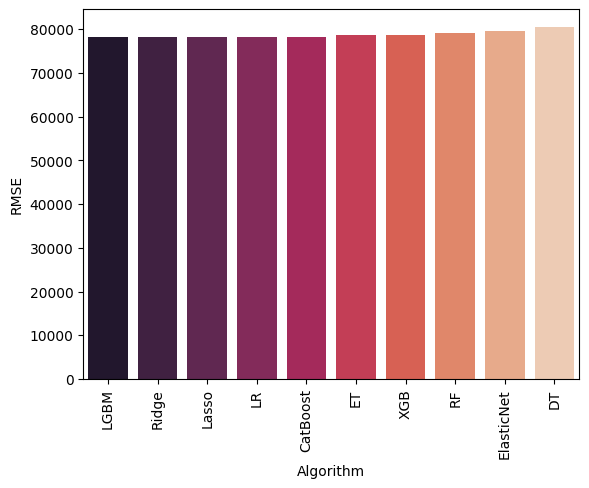

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x = performance_df['Algorithm'], y = performance_df['RMSE'], palette='rocket')
plt.xticks(rotation = 'vertical')
plt.show()

In [94]:
clf = lgbmr

In [95]:
clf.fit(X_train_transformed,y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002648 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2388
[LightGBM] [Info] Number of data points in the train set: 150792, number of used features: 1051
[LightGBM] [Info] Start training from score 43755.228507
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

LGBMRegressor(colsample_bytree=0.8, max_depth=5, n_jobs=-1,
              objective='regression', random_state=42, subsample=0.8)

In [96]:
yf = clf.predict(Xf_transformed)

In [97]:
submission = pd.DataFrame()

In [98]:
submission['id'] = id
submission['price'] = yf

In [99]:
submission.head()

,id,price
0,188533,20809.912359
1,188534,73158.304681
2,188535,55838.370551
3,188536,30399.137996
4,188537,32994.790138


In [100]:
submission.to_csv('submission.csv', index=False)